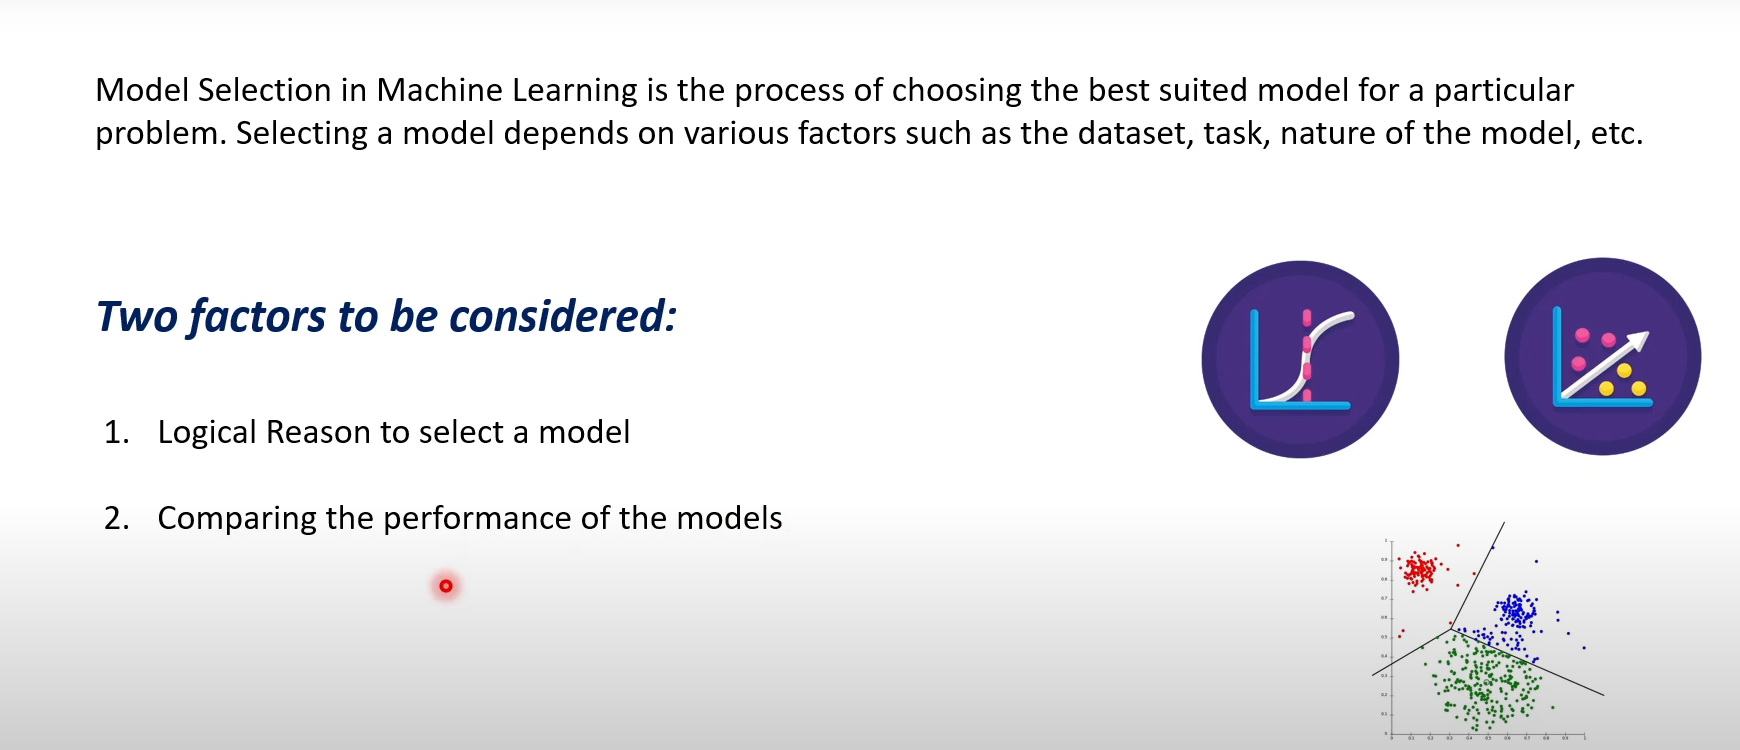

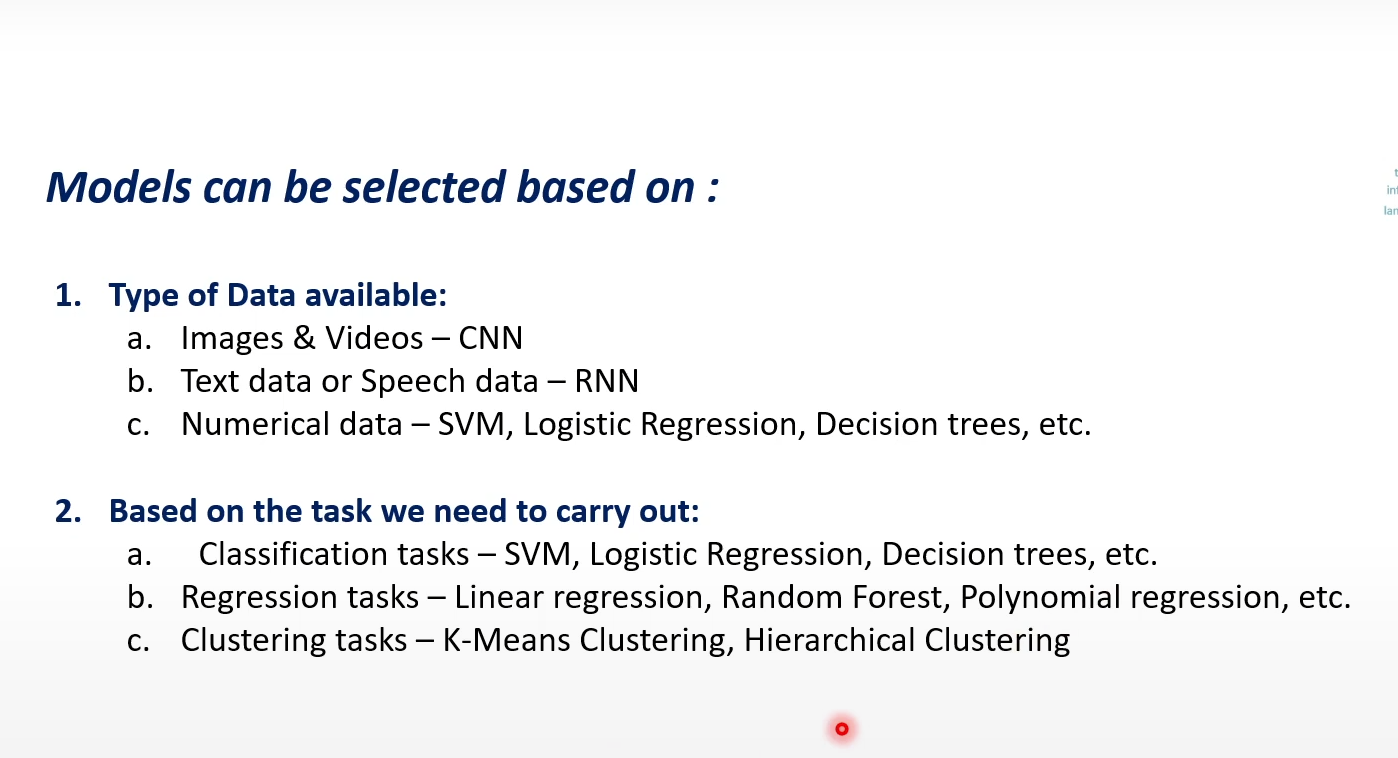

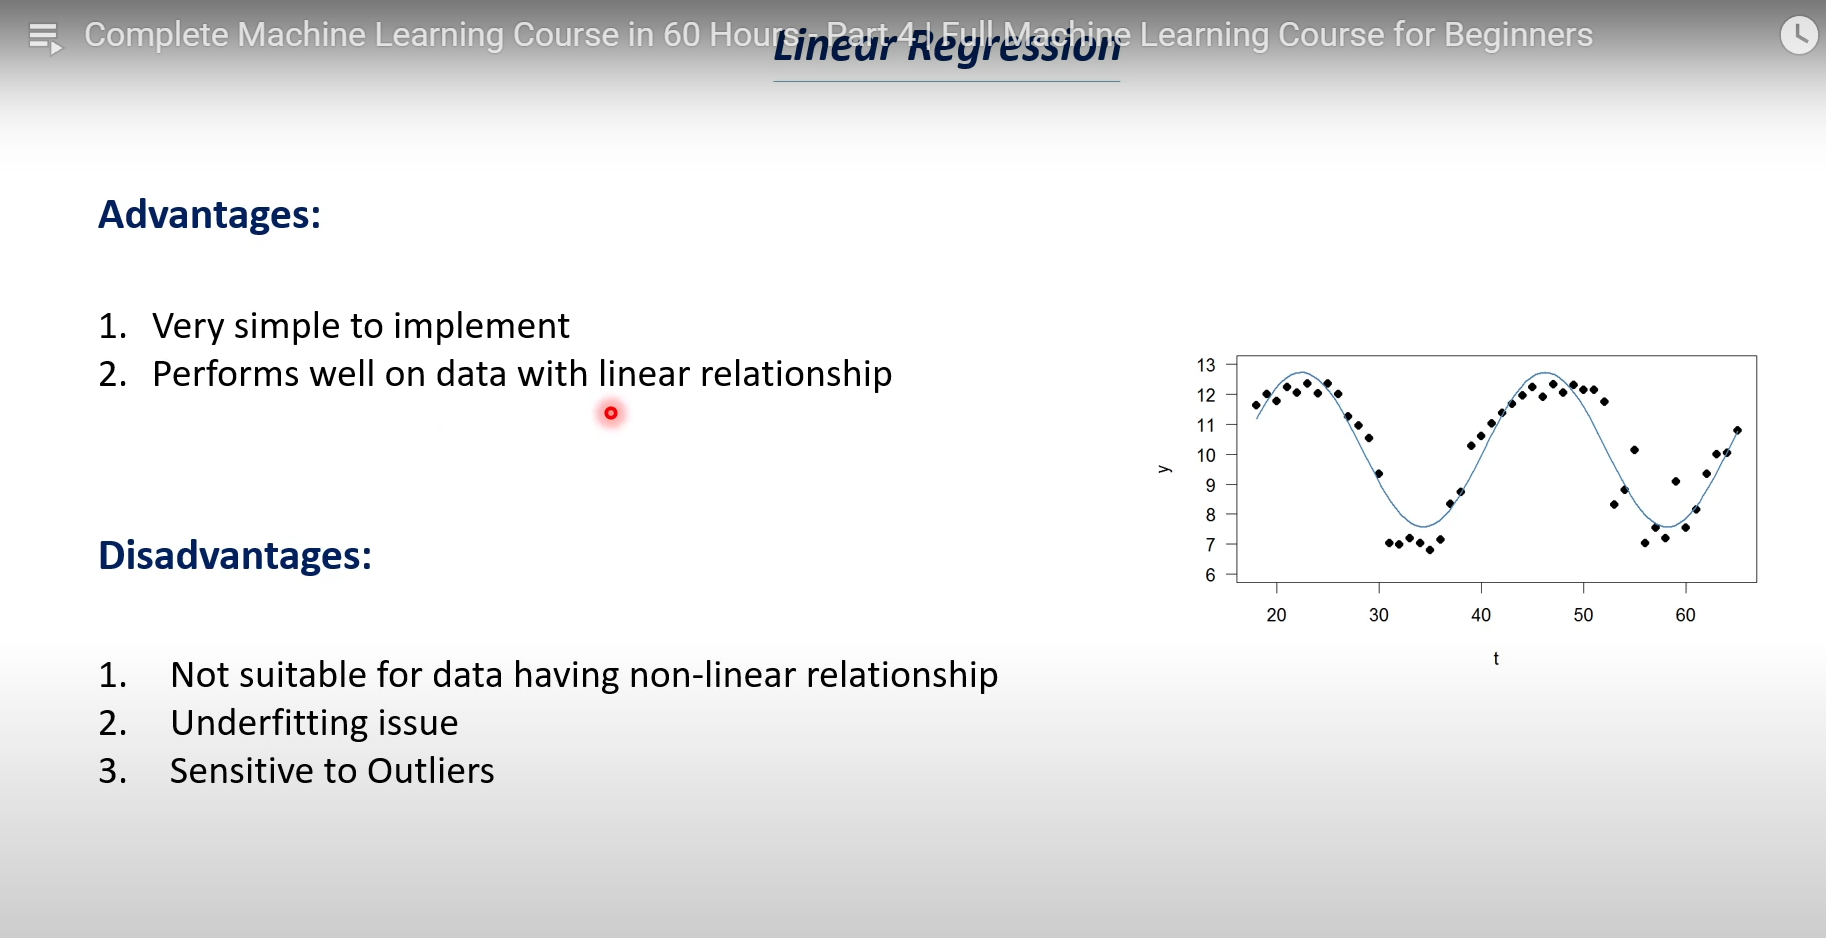

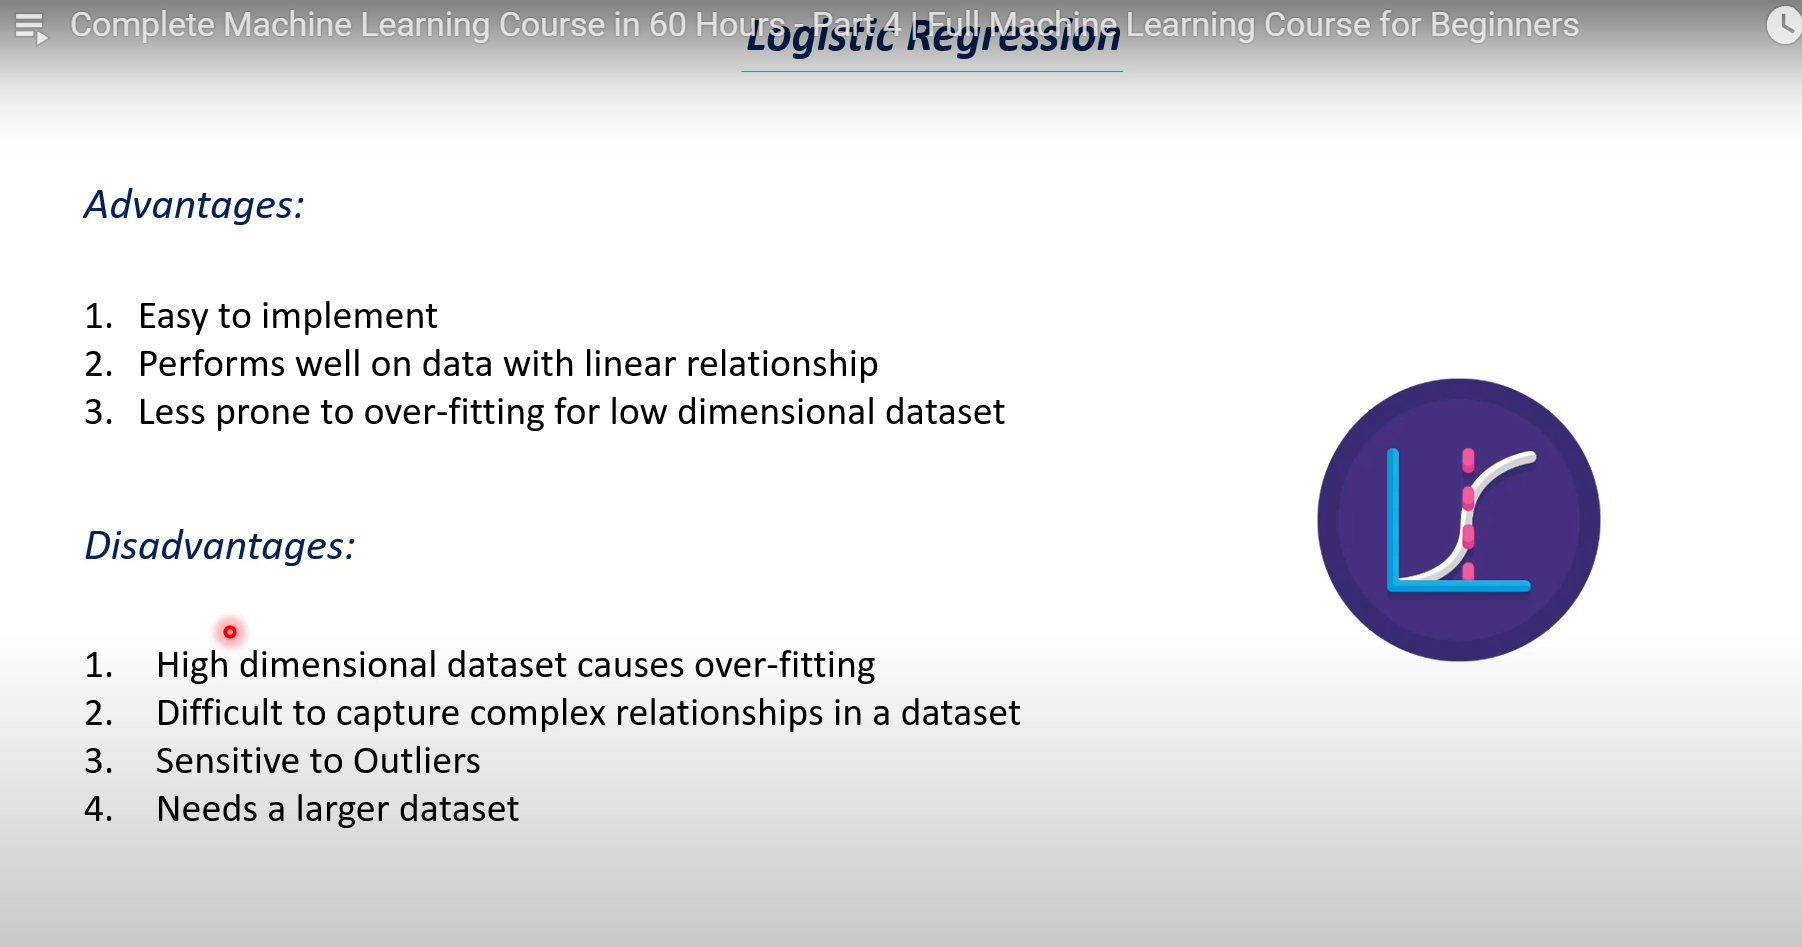

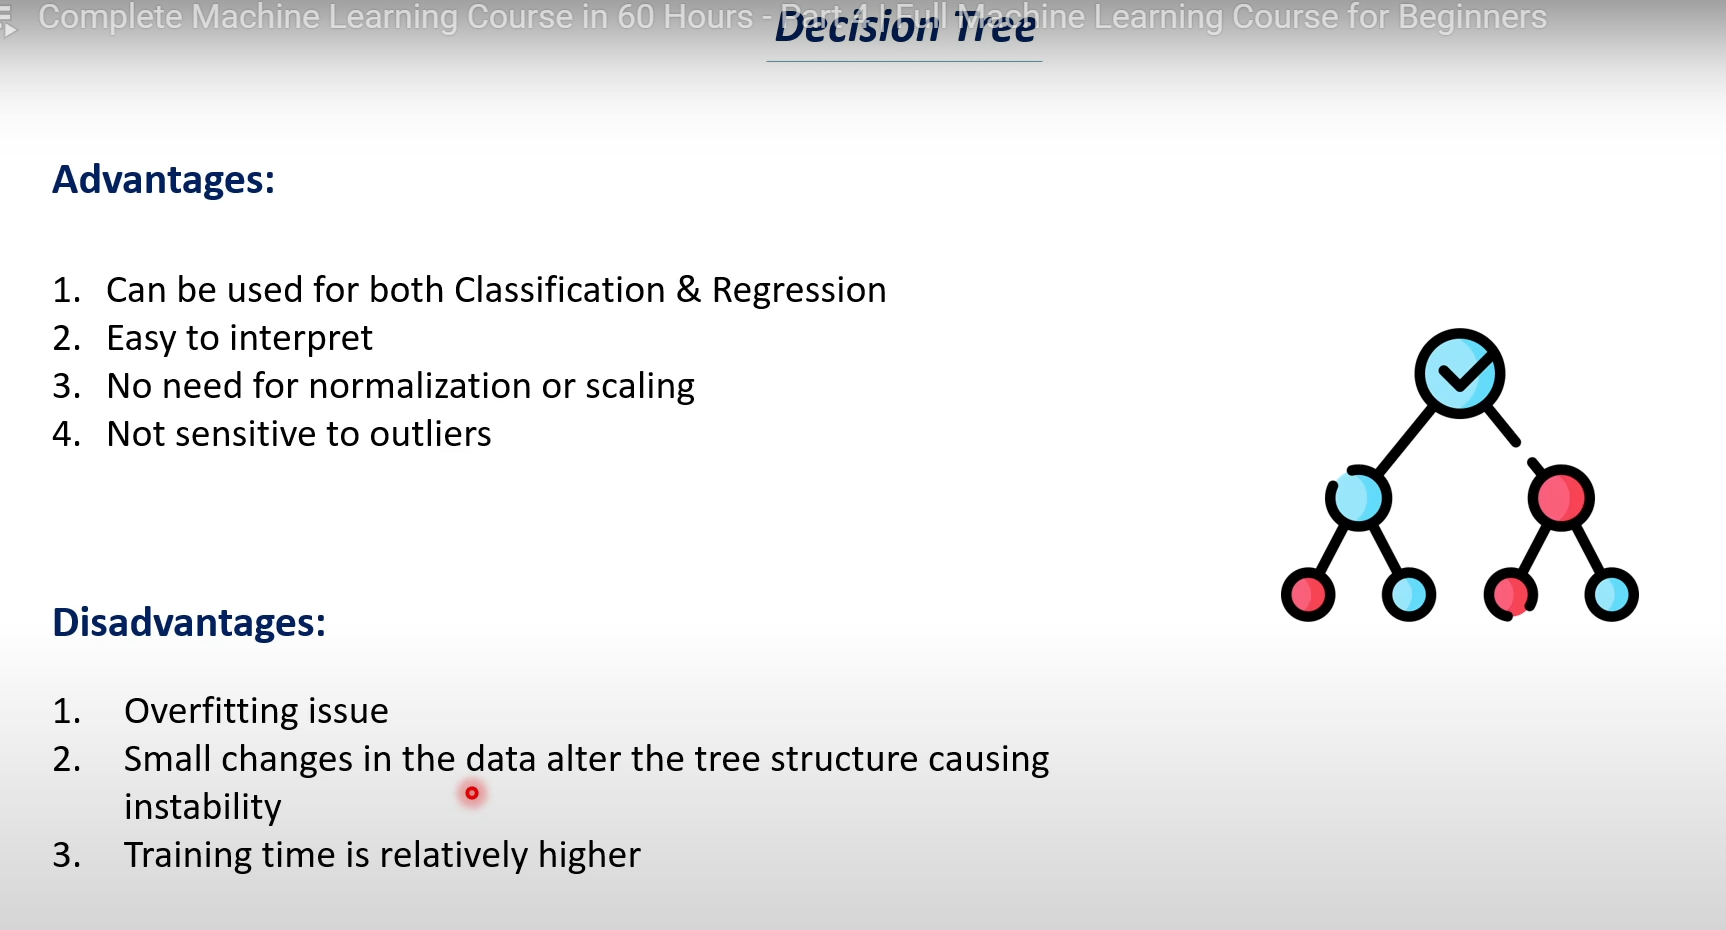

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('/content/heart_disease_data.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
# 1-> Defective heart
# 0-> Healthy heart


In [8]:
#Splitting the features and target
X = df.drop(columns='target',axis=1)
Y  =df['target']

In [9]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [10]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [11]:
X = np.asarray(X)

In [12]:
Y = np.asarray(Y)

#Model Selection

1.3 Comparing the models by default hyper parameters using corss validation

In [13]:
models = [LogisticRegression(max_iter = 1000),SVC(kernel = 'linear'),KNeighborsClassifier(),RandomForestClassifier(random_state = 0)]

In [14]:
def compare_models_cross_validation():
  for model in models:
     cv_score = cross_val_score(model,X,Y,cv=5)
     mean_accuracy = sum(cv_score)/len(cv_score)
     mean_accuracy = mean_accuracy*100
     mean_accuracy = round(mean_accuracy,2)
     print('------------------------------------------------------------------------------------')
     print('Cross Validation accuracies for the ',model,'=',cv_score)
     print('Accuracy score of ',model,'=',mean_accuracy,'%')
     print('------------------------------------------------------------------------------------')

In [15]:
compare_models_cross_validation()

------------------------------------------------------------------------------------
Cross Validation accuracies for the  LogisticRegression(max_iter=1000) = [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy score of  LogisticRegression(max_iter=1000) = 82.83 %
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Cross Validation accuracies for the  SVC(kernel='linear') = [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy score of  SVC(kernel='linear') = 82.83 %
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Cross Validation accuracies for the  KNeighborsClassifier() = [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy score of  KNeighborsClassifier() = 64.39 %
--------------------------------------------

In [16]:
 #inference : RandomForectClassifier has the highest accuracy with default hyperparameter values

2. Comparing the models with different hyperparameters (GridSearchCV)

In [17]:
models_list = [LogisticRegression(max_iter = 10000),SVC(),KNeighborsClassifier(),RandomForestClassifier(random_state = 0)]

In [18]:
#creating a dictionary that contains hyperparameters values for the above mentioned models
model_hyperparameters = {
    'log_reg_hyperparameters' : {
        'C' : [1,5,10,20]
    },
    'svc_hyperparameters' : {
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },
    'KNN_hyperparameters' : {
        'n_neighbors' : [3,5,10]
    },
    'random_forect_hyperparameters' : {
        'n_estimators' : [10,20,50,100]
    }
}

In [19]:
type(model_hyperparameters)

dict

In [20]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forect_hyperparameters'])


In [21]:
print(model_hyperparameters.values())

dict_values([{'C': [1, 5, 10, 20]}, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, {'n_neighbors': [3, 5, 10]}, {'n_estimators': [10, 20, 50, 100]}])


In [22]:
model_keys = list(model_hyperparameters.keys())

In [23]:
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forect_hyperparameters']


In [24]:
model_hyperparameters['log_reg_hyperparameters']

{'C': [1, 5, 10, 20]}

In [25]:
model_hyperparameters['svc_hyperparameters']

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

In [26]:
model_keys[1]

'svc_hyperparameters'

In [27]:
model_hyperparameters[model_keys[1]]

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

Applying GridSearchCV

In [28]:
def ModelSelection(list_of_models,hyperparameter_dictionary):
  result = []
  i=0
  for model in list_of_models:
    key = model_keys[i]
    params = hyperparameter_dictionary[key]
    i+=1

    print(model)
    print(params)

    classifier = GridSearchCV(model,params,cv=5)

    #fitting the data to classifier
    classifier.fit(X,Y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_,
    })

  result_dataframe = pd.DataFrame(result,columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe


In [ ]:
ModelSelection(models_list,model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
